## Analayzing Work Place Satisfaction Survey Data
Introduction:
--------------
This script analyzes the Workplace Satisfaction Survey dataset. The goal is to examine various factors influencing employee satisfaction, such as gender, education, salary, and satisfaction with different aspects of their job (management, salary, work environment, etc.). 

Key objectives of the analysis:
1. Explore and visualize the distribution of key demographic variables like age and salary.
2. Analyze the satisfaction levels across different job aspects (management, salary, colleagues, tasks).
3. Investigate relationships between categorical variables, such as gender and satisfaction with management, to identify any significant patterns or dependencies.
4. Provide actionable insights that can help improve overall workplace satisfaction based on the data findings.

The analysis includes:
- Descriptive statistics and visualizations (histograms, boxplots, heatmaps).
- Cross-tabulation and chi-square tests to analyze relationships between qualitative variables.
- Recommendations for improving workplace satisfaction based on the findings.

"""

# Initial Explorartion

Data Structures and their Properties: Utilize Pandas as the primary data structure to manage and manipulate your dataset.

In [1]:
import pandas as pd


df = pd.read_excel("WorkPlaceSatisfactionSurveyData.xlsx")  

print(df.head())

print(df.info())




   number  gender  age  family  education  years_of_service  salary  \
0       1       1   38       1        1.0              22.0    3587   
1       2       1   29       2        2.0              10.0    2963   
2       3       1   30       1        1.0               7.0    1989   
3       4       1   36       2        1.0              14.0    2144   
4       5       1   24       1        2.0               4.0    2183   

   sat_management  sat_colleques  sat_workingEnvironment  sat_salary  \
0               3            3.0                       3           3   
1               1            5.0                       2           1   
2               3            4.0                       1           1   
3               3            3.0                       3           3   
4               2            3.0                       2           1   

   sat_tasks  healtcare  holidayCabin  gym  muscleCare  
0          3        NaN           NaN  NaN         NaN  
1          3        NaN   

In [ ]:
# Rename column based on the explanation found in the Excel File

df.coloumn= ['number', 'gender','age','family', 'education', 'years_of_service', 'salary', 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks', ' healtcare', 'holidayCabin' ]


C:\Users\karao\AppData\Local\Temp\ipykernel_20112\324833558.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloumn= ['number', 'gender','age','family', 'education', 'years_of_service', 'salary', 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks', ' healtcare', 'holidayCabin' ]


Reading and Writing Data: Import and export data effectively using Python.

In [2]:

df = pd.read_excel("WorkPlaceSatisfactionSurveyData.xlsx")  

df.to_csv('WorkPlaceSatisfactionSurveyData.csv', index=False)

df_exported = pd.read_csv('WorkPlaceSatisfactionSurveyData.csv')

print(df_exported.head())


   number  gender  age  family  education  years_of_service  salary  \
0       1       1   38       1        1.0              22.0    3587   
1       2       1   29       2        2.0              10.0    2963   
2       3       1   30       1        1.0               7.0    1989   
3       4       1   36       2        1.0              14.0    2144   
4       5       1   24       1        2.0               4.0    2183   

   sat_management  sat_colleques  sat_workingEnvironment  sat_salary  \
0               3            3.0                       3           3   
1               1            5.0                       2           1   
2               3            4.0                       1           1   
3               3            3.0                       3           3   
4               2            3.0                       2           1   

   sat_tasks  healtcare  holidayCabin  gym  muscleCare  
0          3        NaN           NaN  NaN         NaN  
1          3        NaN   

Handling Missing Data and Duplicates: Perform data cleaning by managing missing data and duplicates as necessary.

In [3]:
# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Replace missing values with a default value
df_filled = df.fillna(0)

# Remove duplicate rows
df_no_duplicates = df_cleaned.drop_duplicates()

# Verify the cleaned data
print(df_no_duplicates.head())


number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64
Empty DataFrame
Columns: [number, gender, age, family, education, years_of_service, salary, sat_management, sat_colleques, sat_workingEnvironment, sat_salary, sat_tasks, healtcare, holidayCabin, gym, muscleCare]
Index: []


Descriptive Statistics: Compute basic descriptive statistics to summarize and understand your dataset.

In [4]:

print(df.describe())

# Calculate mean, median, and standard deviation for a specific column
mean_age = df['age'].mean()
median_age = df['age'].median()
std_age = df['age'].std()
print(f"Mean Age: {mean_age}, Median Age: {median_age}, Std Age: {std_age}")


          number     gender        age     family  education  \
count  82.000000  82.000000  82.000000  82.000000  81.000000   
mean   41.500000   1.231707  37.951220   1.621951   1.987654   
std    23.815261   0.424519   9.773866   0.487884   0.844006   
min     1.000000   1.000000  20.000000   1.000000   1.000000   
25%    21.250000   1.000000  31.000000   1.000000   1.000000   
50%    41.500000   1.000000  37.500000   2.000000   2.000000   
75%    61.750000   1.000000  44.000000   2.000000   3.000000   
max    82.000000   2.000000  61.000000   2.000000   4.000000   

       years_of_service       salary  sat_management  sat_colleques  \
count         80.000000    82.000000       82.000000      81.000000   
mean          12.175000  2563.878049        3.060976       4.061728   
std            8.807038   849.350302        1.058155       0.826826   
min            0.000000  1521.000000        1.000000       2.000000   
25%            3.750000  2027.000000        2.000000       4.000000 

Organized Data Analysis:


In [5]:
# Rename column based on the explanation found in the Excel File

df.coloumn= ['number', 'gender','age','family', 'education', 'years_of_service', 'salary', 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks', ' healtcare', 'holidayCabin' ]


C:\Users\karao\AppData\Local\Temp\ipykernel_20112\324833558.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloumn= ['number', 'gender','age','family', 'education', 'years_of_service', 'salary', 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks', ' healtcare', 'holidayCabin' ]


In [6]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [7]:
df=df.drop(['gym'], axis=1)

In [8]:
df1=pd.crosstab(df['education'],'count')
df1

col_0,count
education,
1.0,27
2.0,30
3.0,22
4.0,2


In [9]:
df1.index=['Primary School','Secondary School Graduate','Bachelor Level','Master Level']
df1

col_0,count
Primary School,27
Secondary School Graduate,30
Bachelor Level,22
Master Level,2


Data Visualization with Matplotlib: Visualize your data using Matplotlib or Pandas' graphing functions.

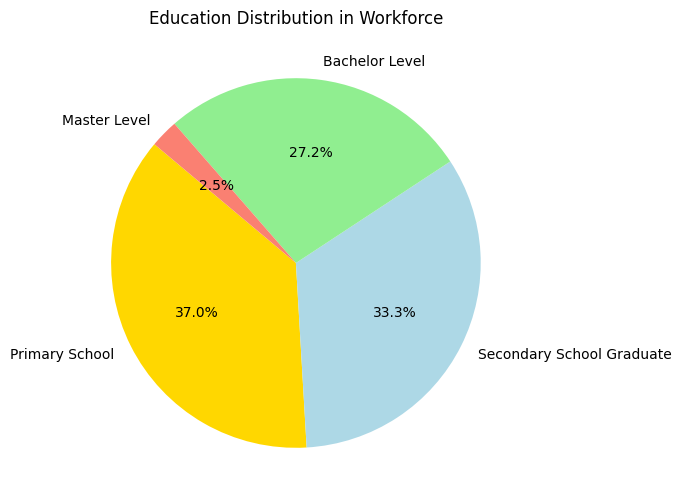

In [10]:
import matplotlib.pyplot as plt

# Count the number of employees in each education category
education_counts = df['education'].value_counts()

# Rename education levels for better readability
education_labels = ['Primary School', 'Secondary School Graduate', 'Bachelor Level', 'Master Level']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'salmon'])

# Add title
plt.title('Education Distribution in Workforce')
plt.show()


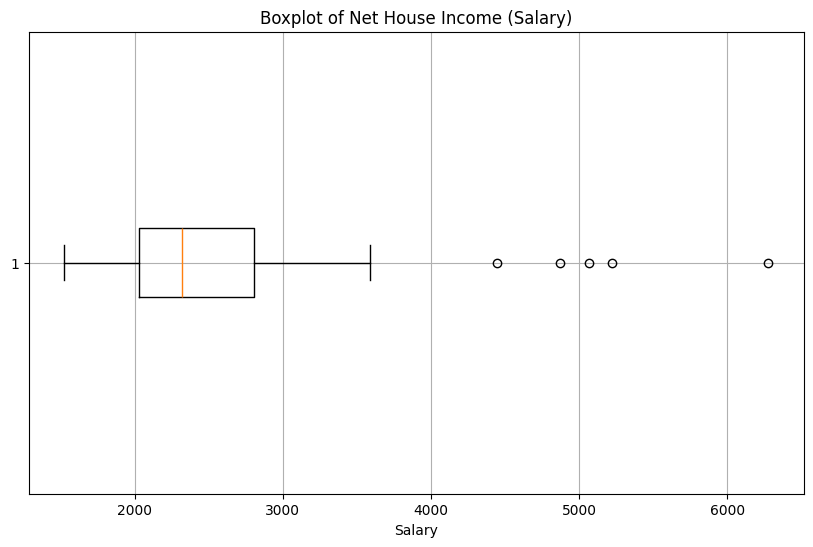

In [11]:
import matplotlib.pyplot as plt

# Create the boxplot for the "salary" column
plt.figure(figsize=(10, 6))
plt.boxplot(df['salary'], vert=False)  
plt.title('Boxplot of Net House Income (Salary)')
plt.xlabel('Salary')
plt.grid(True)
plt.show()

Frequency/Count Tables and Percentages: Generate tables using frequencies, counts, and percentages, ensuring to include the total sample size ( n).

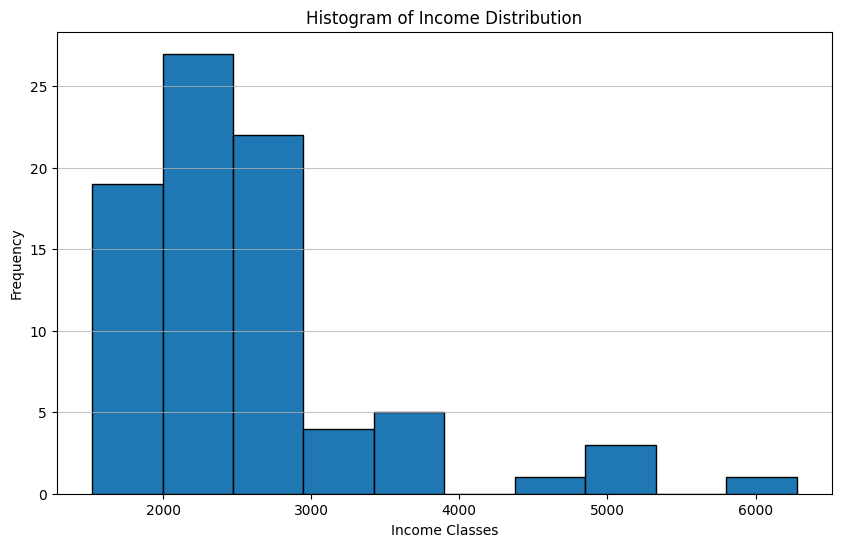

In [12]:
import matplotlib.pyplot as plt

# Create histogram for the "income" column
plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=10, edgecolor='black')  
plt.title('Histogram of Income Distribution')
plt.xlabel('Income Classes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

sat_salary
1    33
2    19
3    19
4    10
5     1
Name: count, dtype: int64


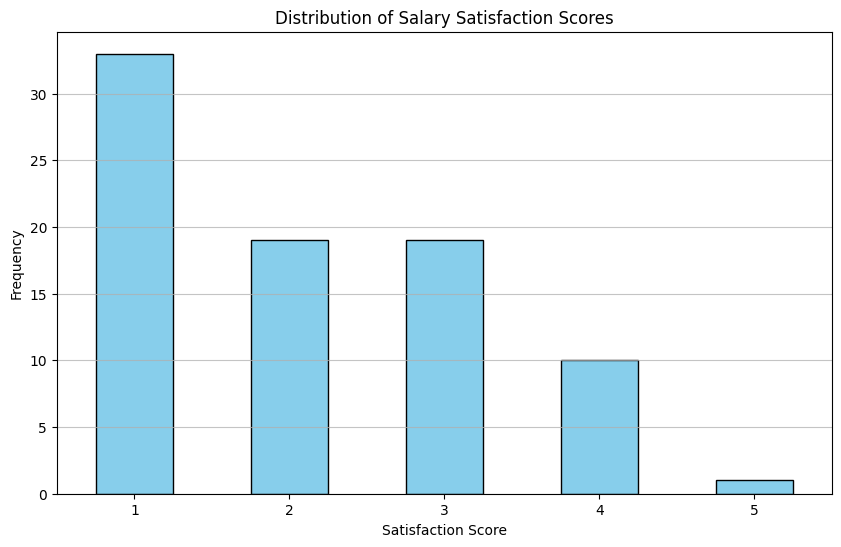

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'sat_salary': [1]*33 + [2]*19 + [3]*19 + [4]*10 + [5]*1  
}
df = pd.DataFrame(data)

# Analyze a single variable (e.g., satisfaction score)
satisfaction_counts = df['sat_salary'].value_counts().sort_index()  
print(satisfaction_counts)

# Bar chart of the satisfaction scores
plt.figure(figsize=(10, 6))
satisfaction_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(ticks=range(5), labels=[1, 2, 3, 4, 5], rotation=0)  
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Salary Satisfaction Scores')
plt.grid(axis='y', alpha=0.75)
plt.show()


Principles of Visual Analytics: Apply visual analytics techniques using frequencies, counts, and percentages.

        Primary School  Secondary School   Bachelor    Master
Male         35.483871         37.096774  24.193548  3.225806
Female       26.315789         36.842105  36.842105  0.000000


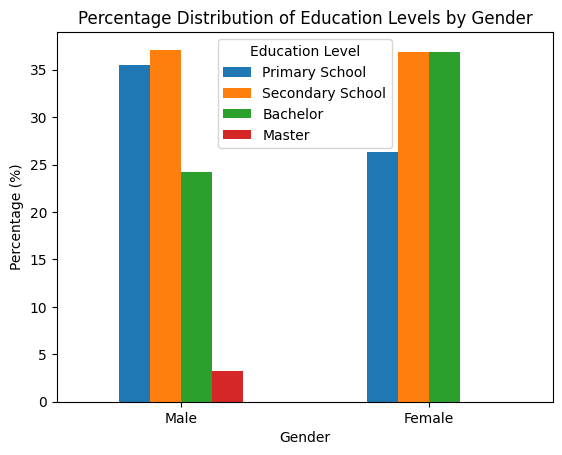

In [14]:
df = pd.read_excel(r"WorkPlaceSatisfactionSurveyData.xlsx")
# Create crosstab of gender and education
gender_education_ct = pd.crosstab(df['gender'], df['education'], normalize='index') * 100

# Rename the axes for better readability
gender_education_ct.index = ['Male', 'Female']  # Assuming 1=Male, 2=Female in the gender column
gender_education_ct.columns = ['Primary School', 'Secondary School', 'Bachelor', 'Master']

# Print percentage distribution table
print(gender_education_ct)

# Plot grouped bar chart for percentage distribution of education by gender
gender_education_ct.plot(kind='bar')
plt.title('Percentage Distribution of Education Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Education Level')
plt.xticks(rotation=0)  
plt.show()



Customizing Graphs: Customize graphs to enhance clarity and visual appeal beyond default settings.

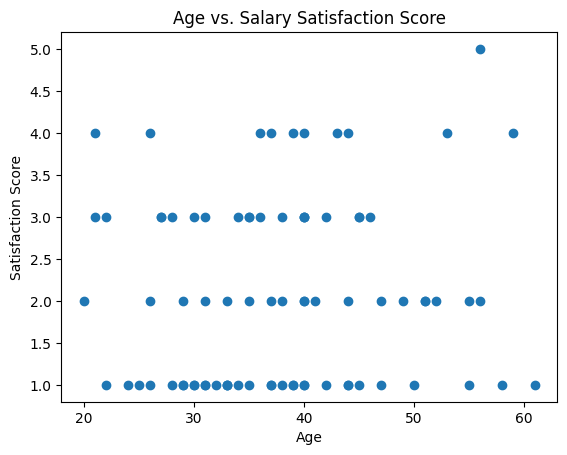

In [15]:
df = pd.read_excel(r"WorkPlaceSatisfactionSurveyData.xlsx")
plt.scatter(df['age'], df['sat_salary'])
plt.xlabel('Age')
plt.ylabel('Satisfaction Score')
plt.title('Age vs. Salary Satisfaction Score')
plt.show()


Exploratory Data Analysis (EDA): Conduct exploratory data analysis, including variable selection, indexing, grouping, and transforming the data.

age_group
30-40    35
20-30    19
40-50    16
50-60    10
Name: count, dtype: int64
age_group
20-30    2.052632
30-40    2.057143
40-50    2.125000
50-60    2.500000
Name: sat_salary, dtype: float64


C:\Users\karao\AppData\Local\Temp\ipykernel_20112\4086478580.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('age_group')['sat_salary'].mean()


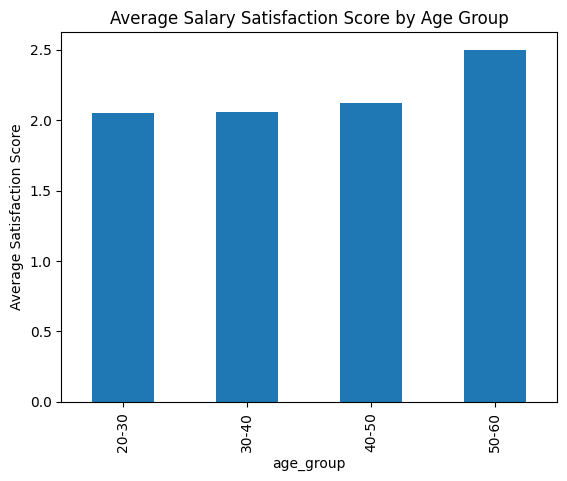

In [16]:
# Grouping data by age groups
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
print(df['age_group'].value_counts())

# Aggregation of data
grouped_data = df.groupby('age_group')['sat_salary'].mean()
print(grouped_data)

# Visualization
grouped_data.plot(kind='bar')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Salary Satisfaction Score by Age Group')
plt.show()


Analysis of Variable Types: Perform analyses on categorical variables, numerical variables, and pairs of variables.

gender
1    63
2    19
Name: count, dtype: int64


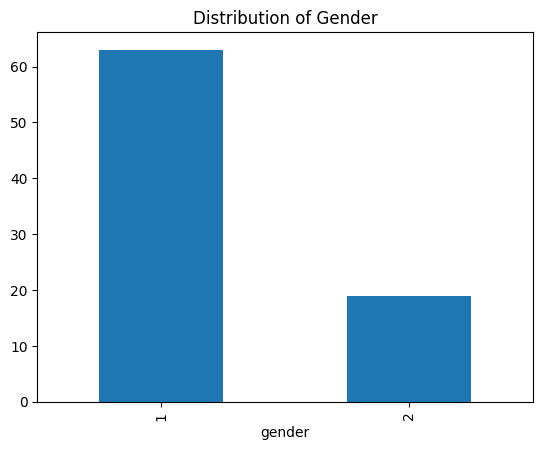

count    82.000000
mean     37.951220
std       9.773866
min      20.000000
25%      31.000000
50%      37.500000
75%      44.000000
max      61.000000
Name: age, dtype: float64


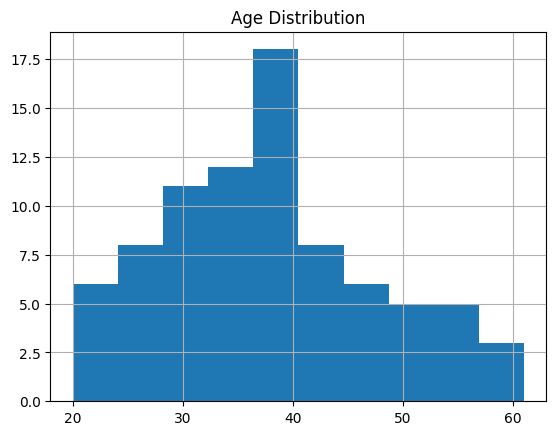

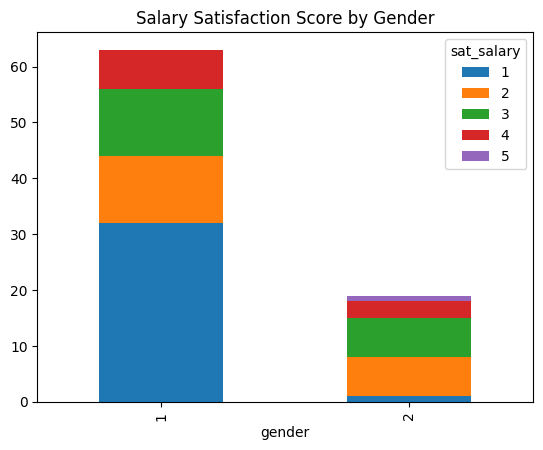

In [17]:
# Analyzing Categorical Variables
print(df['gender'].value_counts())
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.show()

# Analyzing Numerical Variables
print(df['age'].describe())
df['age'].hist()
plt.title('Age Distribution')
plt.show()

# Mixed Analysis (Categorical and Numerical)
pd.crosstab(df['gender'], df['sat_salary']).plot(kind='bar', stacked=True)
plt.title('Salary Satisfaction Score by Gender')
plt.show()


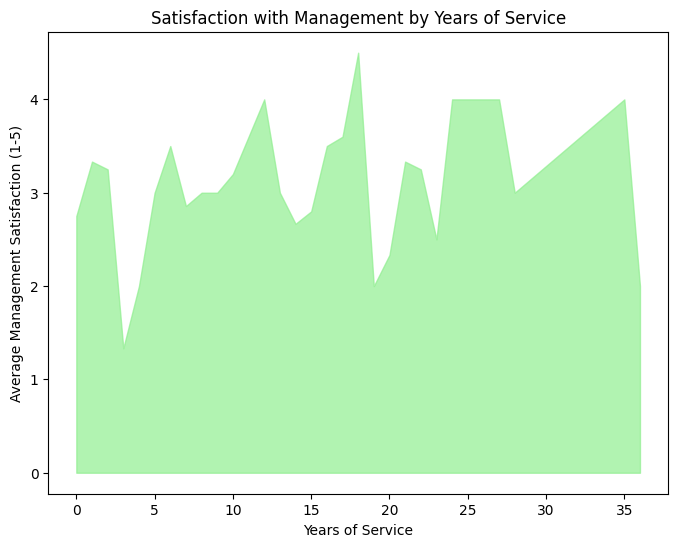

In [18]:
# Group data by years of service and calculate the mean management satisfaction
satisfaction_by_years_of_service = df.groupby('years_of_service')['sat_management'].mean()

# Plot the area chart
plt.figure(figsize=(8, 6))
plt.fill_between(satisfaction_by_years_of_service.index, satisfaction_by_years_of_service, color='lightgreen', alpha=0.7)

# Add labels and title
plt.title('Satisfaction with Management by Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Average Management Satisfaction (1-5)')
plt.show()


In [19]:
# Create an overall satisfaction score by averaging the satisfaction variables
satisfaction_columns = ['sat_management', 'sat_colleques', 'sat_workingEnvironment', 
                        'sat_salary', 'sat_tasks']
df['overall_satisfaction'] = df[satisfaction_columns].mean(axis=1)

# Display the first few rows with the new overall satisfaction column
print(df[['number', 'overall_satisfaction']].head())


   number  overall_satisfaction
0       1                   3.0
1       2                   2.4
2       3                   2.4
3       4                   3.0
4       5                   2.0


In [20]:
# Descriptive statistics for overall satisfaction
print(df['overall_satisfaction'].describe())


count    82.000000
mean      3.125610
std       0.768486
min       1.400000
25%       2.650000
50%       3.000000
75%       3.750000
max       5.000000
Name: overall_satisfaction, dtype: float64


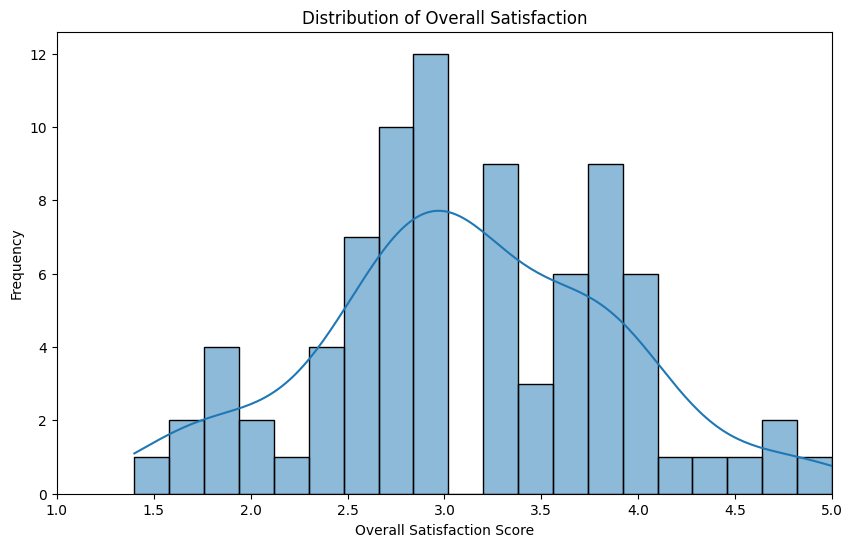

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for overall satisfaction
plt.figure(figsize=(10, 6))
sns.histplot(df['overall_satisfaction'], bins=20, kde=True)
plt.title('Distribution of Overall Satisfaction')
plt.xlabel('Overall Satisfaction Score')
plt.ylabel('Frequency')
plt.xlim(1, 5) 
plt.show()
